In [1]:
import os
import pandas as pd
import zipfile
import gensim
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import src.utils as utils

In [51]:
df = pd.read_csv(r"dataset/lenta-news-25k.csv")

## Tfidf + SVD + KMeans

In [3]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=40, ngram_range=(1,1))
tfidf_matrix = tf_idf.fit_transform(df['lemma'])

svd = TruncatedSVD(n_components=300, random_state=999)
svd_matrix = svd.fit_transform(tfidf_matrix)


<Figure size 432x288 with 0 Axes>

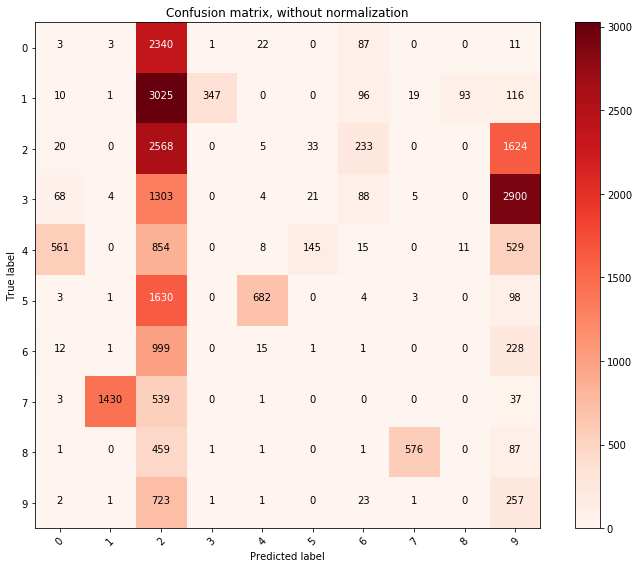

In [9]:
tfidf_labels = utils.fit_kmeans(svd_matrix, 10)
cm = confusion_matrix(df['labels'], tfidf_labels)
utils.plot_confusion_matrix(cm, classes=range(10))

### 1-2 ngram

In [37]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=40, ngram_range=(1,2))
tfidf_matrix = tf_idf.fit_transform(df['lemma'])

svd = TruncatedSVD(n_components=50, random_state=999)
svd_matrix = svd.fit_transform(tfidf_matrix)


<Figure size 432x288 with 0 Axes>

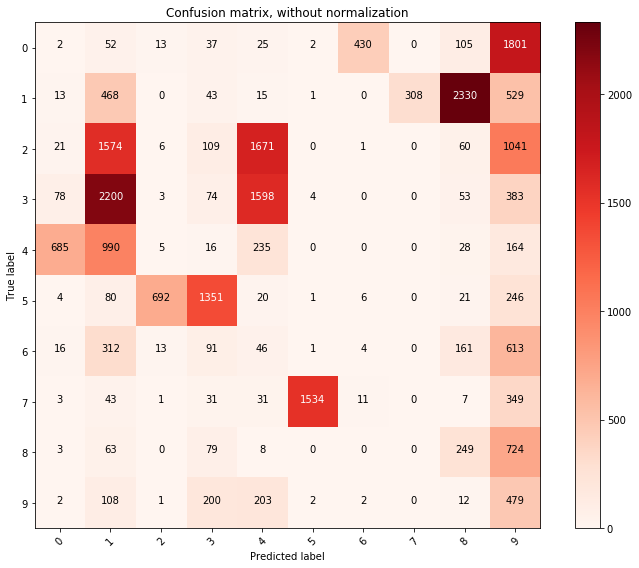

In [38]:
tfidf_labels = utils.fit_kmeans(svd_matrix, 10)
cm = confusion_matrix(df['labels'], tfidf_labels)
utils.plot_confusion_matrix(cm, classes=range(10))

### 2-3 ngram

In [43]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=20, ngram_range=(2,3))
tfidf_matrix = tf_idf.fit_transform(df['lemma'])

svd = TruncatedSVD(n_components=3, random_state=999)
svd_matrix = svd.fit_transform(tfidf_matrix)


<Figure size 432x288 with 0 Axes>

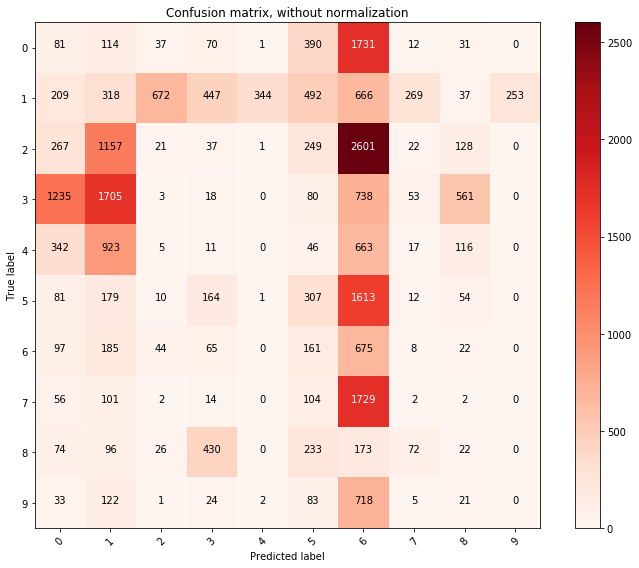

In [44]:
tfidf_labels = utils.fit_kmeans(svd_matrix, 10)
cm = confusion_matrix(df['labels'], tfidf_labels)
utils.plot_confusion_matrix(cm, classes=range(10))

### 1-3 ngram

In [45]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=20, ngram_range=(1,3))
tfidf_matrix = tf_idf.fit_transform(df['lemma'])

svd = TruncatedSVD(n_components=80, random_state=999)
svd_matrix = svd.fit_transform(tfidf_matrix)

<Figure size 432x288 with 0 Axes>

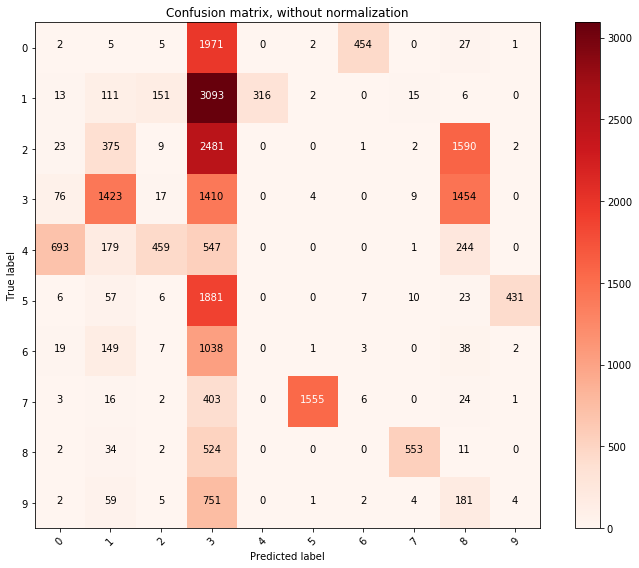

In [46]:
tfidf_labels = utils.fit_kmeans(svd_matrix, 10)
cm = confusion_matrix(df['labels'], tfidf_labels)
utils.plot_confusion_matrix(cm, classes=range(10))

#### Вывод
Tfidf + SVD + Kmeans плохо класстеризуют данный датасет. Имеют тендцию к групировке вокруг одного кластера. Более-менее можно выделить 7 кластер и, иногда, 2 и 3 кластер.